In [11]:
!gdown 1r2Sb4ogBjRR1Wu28gy9X2D4WmOdFoICT
!gdown 1JRN1IcKBL-Q_j0JTFgi8Arn9bmJJ8aEJ

Downloading...
From: https://drive.google.com/uc?id=1r2Sb4ogBjRR1Wu28gy9X2D4WmOdFoICT
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 16.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JRN1IcKBL-Q_j0JTFgi8Arn9bmJJ8aEJ
To: /content/zipcodes.csv
100% 590/590 [00:00<00:00, 2.53MB/s]


In [12]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

def load_data_from_file(fileName="advertising.csv"):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]  # The first 3 columns are the features
    sales_Y = data[:, 3]      # The 4th column is the sales (target variable)

    features_X = np.insert(features_X, 0, 1, axis=1)  # Add a column of ones for the bias term
    return features_X, sales_Y

In [14]:
# question 2
features_X, sales_Y = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [15]:
 # question 3
 _, sales_Y = load_data_from_file()
 print(sales_Y.shape)

(200,)


In [16]:
def create_individual(n=4, bound=10):
    individual = [random.uniform(0, bound) for _ in range(n)]
    return individual

In [18]:
individual = create_individual()
print(individual)

[8.444218515250482, 7.579544029403024, 4.20571580830845, 2.5891675029296337]


In [19]:
# question 4
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)  # Predicted sales based on individual parameters (theta)
    loss = np.mean((y_hat - sales_Y) ** 2)  # Mean squared error (MSE)
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1e-6)  # Adding a small value to prevent division by zero

    return fitness_value

In [20]:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0186001912531549e-06


In [24]:
# question 5
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    if random.random() < crossover_rate:
        crossover_point = random.randint(1, len(individual1) - 1)  # Random crossover point
        individual1_new[:crossover_point], individual2_new[:crossover_point] = individual2[:crossover_point], individual1[:crossover_point]
        individual1_new[crossover_point:], individual2_new[crossover_point:] = individual2[crossover_point:], individual1[crossover_point:]

    return individual1_new, individual2_new


In [25]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57,-0.79,-2.41]
individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [26]:
# question 6
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual_m[i] = random.uniform(0, 10)

    return individual_m

In [27]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [28]:
def initializePopulation(m):
 population = [create_individual() for _ in range(m)]
 return population

In [29]:
def selection(sorted_old_population, m=100):
    index1 = random.randint(0, m-1)
    index2 = random.randint(0, m-1)

    while index2 == index1:
        index2 = random.randint(0, m-1)

    if index2 < index1:
        individual_s = sorted_old_population[index2]
    else:
        individual_s = sorted_old_population[index1]

    return individual_s

In [30]:
# question 7
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)

    # Sort population by fitness (ascending order, lower loss is better)
    sorted_population = sorted(old_population, key=compute_fitness, reverse=True)

    # Print best loss every generation
    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[0]), "with chromosome: ", sorted_population[0])

    new_population = []

    # Fill new population with crossover and mutation
    while len(new_population) < m - elitism:
        # Selection: select two parents
        parent1 = selection(sorted_population, m)
        parent2 = selection(sorted_population, m)

        # Crossover: create two offspring
        offspring1, offspring2 = crossover(parent1, parent2)

        # Mutation: apply mutation to the offspring
        offspring1 = mutate(offspring1)
        offspring2 = mutate(offspring2)

        # Add the offspring to the new population
        new_population.append(offspring1)
        if len(new_population) < m - elitism:
            new_population.append(offspring2)

    # Copy elitism chromosomes (the best individuals) to the next generation
    for ind in sorted_population[:elitism]:
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[0])


In [31]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57,-0.79,-2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromosome:  [3.44, 2.57, -0.79, -2.41]


In [33]:
def run_GA():
    n_generations = 100
    m = 600

    # load data from the file
    features_X, sales_Y = load_data_from_file()

    # initialize the population (you should have an `initializePopulation` function)
    population = initializePopulation(m)

    losses_list = []  # store the best loss for each generation

    # run the genetic algorithm
    for i in range(n_generations):
        # create a new population and get the best loss of the current population
        population, best_loss = create_new_population(population, elitism=2, gen=i)

        # append the best loss of the current generation to the losses list
        losses_list.append(best_loss)

        if i % 10 == 0:
            print(f"Generation {i}: Best loss = {best_loss}")

    return losses_list

Best loss: 7100.298171183965 with chromosome:  [3.4743383795783944, 0.04493207256296983, 1.9077338067656535, 1.1081067227867492]
Generation 0: Best loss = 7100.298171183965
Best loss: 7100.298171183965 with chromosome:  [3.4743383795783944, 0.04493207256296983, 1.9077338067656535, 1.1081067227867492]
Best loss: 7100.298171183965 with chromosome:  [3.4743383795783944, 0.04493207256296983, 1.9077338067656535, 1.1081067227867492]
Best loss: 7100.298171183965 with chromosome:  [3.4743383795783944, 0.04493207256296983, 1.9077338067656535, 1.1081067227867492]
Best loss: 1786.4423610580054 with chromosome:  [1.048631326250975, 0.11652796708961022, 0.3804428664510162, 0.817416683625235]
Best loss: 1695.3278498245008 with chromosome:  [3.4743383795783944, 0.04493207256296983, 0.18375957092447215, 1.1081067227867492]
Best loss: 1119.4950256349439 with chromosome:  [4.197853778540753, 0.0033791369799562876, 1.3223381043380655, 0.20549620641776678]
Best loss: 1119.4950256349439 with chromosome:  [

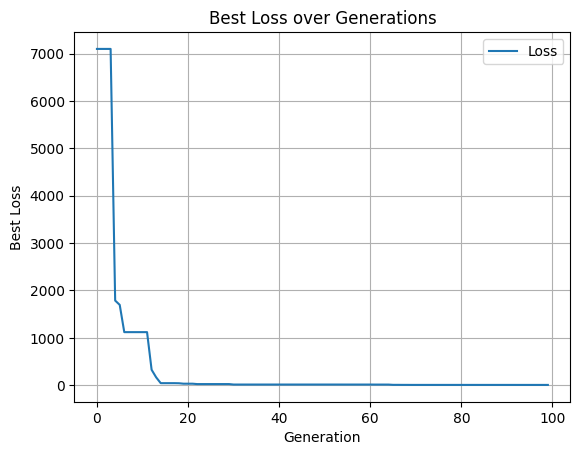

In [34]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    # Plot the losses over generations
    plt.plot(losses_list, label='Loss')
    plt.xlabel('Generation')
    plt.ylabel('Best Loss')
    plt.title('Best Loss over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

# running the GA and visualizing the loss
losses_list = run_GA()
visualize_loss(losses_list)

Best loss: 11492.901842932719 with chromosome:  [2.9801235690572603, 0.3652960275724215, 1.4653343789832873, 0.7578674361790194]
Generation 0: Best loss = 11492.901842932719
Best loss: 11492.901842932719 with chromosome:  [2.9801235690572603, 0.3652960275724215, 1.4653343789832873, 0.7578674361790194]
Best loss: 3161.3215015343235 with chromosome:  [3.026807572262522, 0.13495399951770293, 0.24627609618843804, 1.165243014030356]
Best loss: 3161.3215015343235 with chromosome:  [3.026807572262522, 0.13495399951770293, 0.24627609618843804, 1.165243014030356]
Best loss: 3161.3215015343235 with chromosome:  [3.026807572262522, 0.13495399951770293, 0.24627609618843804, 1.165243014030356]
Best loss: 3017.3095706998183 with chromosome:  [3.026807572262522, 0.13495399951770293, 0.1904245269719973, 1.165243014030356]
Best loss: 3017.3095706998183 with chromosome:  [3.026807572262522, 0.13495399951770293, 0.1904245269719973, 1.165243014030356]
Best loss: 2230.3864544053345 with chromosome:  [5.677

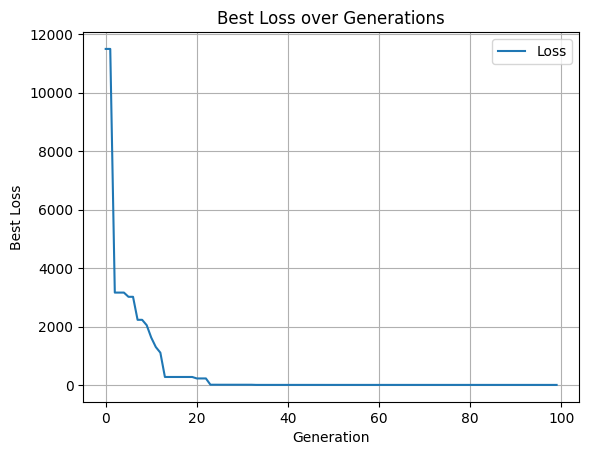

Best individual: [6.361865701693731, 0.04074120141874915, 0.09120870228186195, 0.02342747636700615]


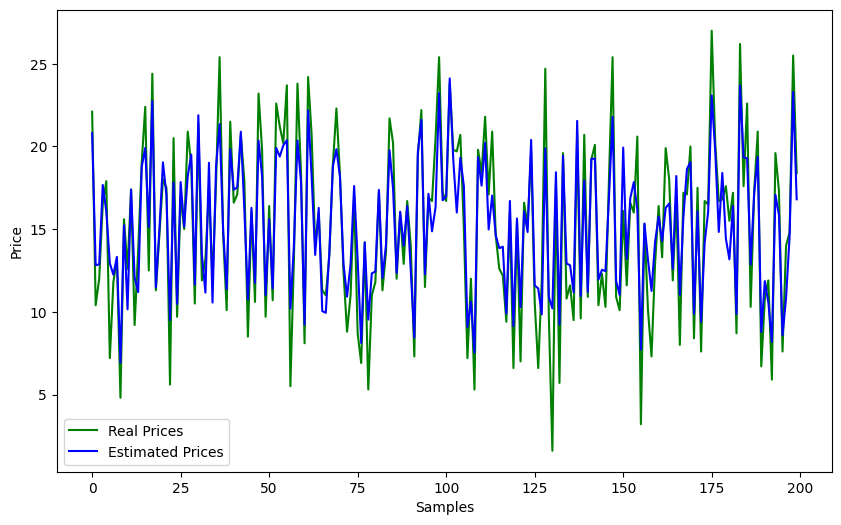

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_predict_gt(population):
    # Sort the population by fitness in ascending order (better fitness first)
    sorted_population = sorted(population, key=compute_fitness, reverse=True)

    # Get the best individual (last in the sorted list after sorting in descending order)
    best_individual = sorted_population[0]
    print("Best individual:", best_individual)

    # Convert the best individual's chromosome to a numpy array (parameters theta)
    theta = np.array(best_individual)

    # Calculate the predicted values (estimated prices)
    estimated_prices = []
    for feature in features_X:
        estimated_price = np.dot(feature, theta)  # Prediction for a single sample
        estimated_prices.append(estimated_price)

    # Visualization of the real prices and estimated prices
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')

    # Plot real prices (sales_Y) in green
    plt.plot(sales_Y, c='green', label='Real Prices')

    # Plot estimated prices in blue
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')

    # Add legend and display the plot
    plt.legend()
    plt.show()

def run_GA():
    n_generations = 100
    m = 600

    # load data from the file
    features_X, sales_Y = load_data_from_file()

    # initialize the population (you should have an `initializePopulation` function)
    population = initializePopulation(m)

    losses_list = []  # store the best loss for each generation

    # run the genetic algorithm
    for i in range(n_generations):
        # create a new population and get the best loss of the current population
        population, best_loss = create_new_population(population, elitism=2, gen=i)

        # append the best loss of the current generation to the losses list
        losses_list.append(best_loss)

        if i % 10 == 0:
            print(f"Generation {i}: Best loss = {best_loss}")

    return losses_list, population # Return population

# running the GA and visualizing the loss
losses_list, population = run_GA() # Store returned population
visualize_loss(losses_list)
visualize_predict_gt(population) # Pass population to the function